## 第一周/第五题-pandas/车队数据可视化

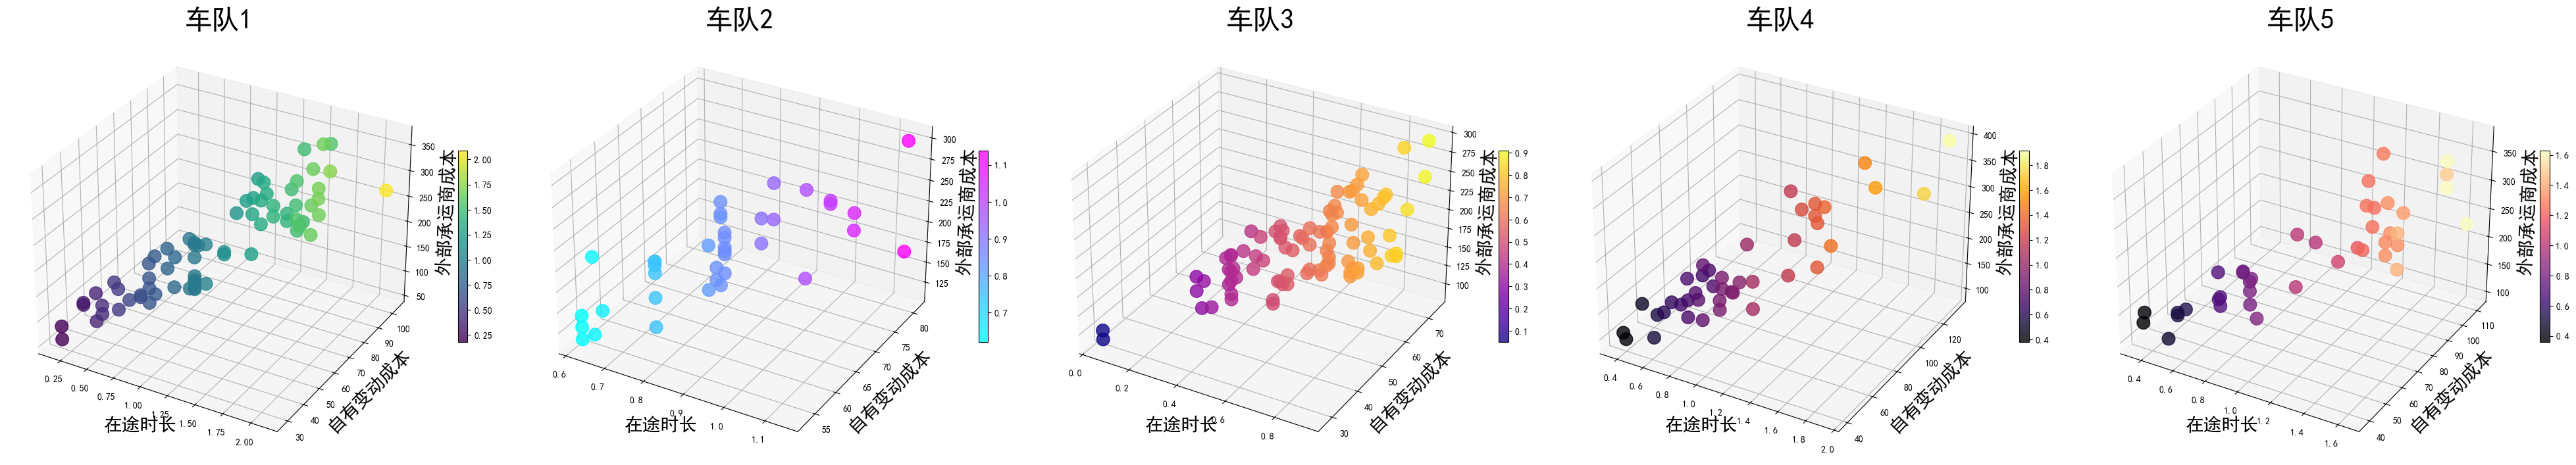

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from jupyter_server.services.kernels.connection.base import deserialize_msg_from_ws_v1
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['SimHei']

df=pd.read_csv('data/二轮第一周第五题(Sheet1).csv')
#一 五个散点图
groups=df['车队编码'].unique()
#创建图形和设置尺寸
fig=plt.figure(figsize=(40,10))
#循环创建五个子图
for i ,group in enumerate(groups):
    ax=fig.add_subplot(1,5,i+1,projection='3d')#一行五列的第i+1个子图
    vehicle_group=df[df['车队编码']==group]
    #颜色设置
    cmaps=['viridis','cool','plasma','inferno','magma']
    #绘制散点图
    scatter=ax.scatter(vehicle_group['在途时长'],vehicle_group['自有变动成本'],vehicle_group['外部承运商成本'],c=vehicle_group['在途时长'],cmap=cmaps[i],s=200,alpha=0.8)

    ax.set_xlabel('在途时长',fontsize=20)
    ax.set_ylabel('自有变动成本',fontsize=20)
    ax.set_zlabel('外部承运商成本',fontsize=20)

    ax.set_title(f'{group}',fontsize=30)

    plt.colorbar(scatter,ax=ax,shrink=0.3)

plt.tight_layout()
plt.show()



In [67]:
df

,车队编码,在途时长,自有变动成本,外部承运商成本
0,车队1,1.02,62,129
1,车队1,1.02,62,207
2,车队1,1.50,89,201
3,车队1,1.33,79,279
4,车队1,1.25,79,303
...,...,...,...,...
275,车队5,0.69,53,168
276,车队5,0.69,53,152
277,车队5,0.47,43,101
278,车队5,0.36,39,131


In [68]:
#2. 在控制台中打印每个车队各项数据数据的`最大值`，`最小值`，`平均值`，`中位数`
df1=df.groupby('车队编码').agg({
    '在途时长':['max','min','mean','median'],
    '自有变动成本':['max','min','mean','median'],
    '外部承运商成本':['max','min','mean','median']
})
df1.rename(columns={'max':"最大值","min":'最小值','mean':'平均值','median':'中位数'})
df1

在途时长                        自有变动成本                       外部承运商成本       \
       max   min      mean median    max min       mean median     max  min   
车队编码                                                                          
车队1   2.09  0.18  1.077083  1.020    103  29  65.430556   62.0     363   59   
车队2   1.14  0.62  0.844474  0.840     81  53  64.789474   65.0     300  114   
车队3   0.91  0.05  0.583523  0.610     74  28  56.579545   58.0     293   90   
车队4   1.92  0.38  0.972857  0.895    133  40  72.404762   69.5     392   95   
车队5   1.63  0.36  1.029250  1.045    111  39  73.875000   83.0     373  101   

                         
            mean median  
车队编码                     
车队1   200.402778  200.0  
车队2   195.710526  198.5  
车队3   173.806818  171.0  
车队4   205.380952  177.5  
车队5   214.850000  204.5

In [76]:
# 分别计算每个车队的最佳时均成本，并打印到控制台中，计算方法：
#     - 计算 `总成本 = 自有变动成本 + 外部承运商成本`
#     - 计算 `时均成本 = 总成本 / 在途时长`
df["总成本"]=df["自有变动成本"]+df['外部承运商成本']
df['时均成本']=df['总成本']/df['在途时长']
df2=df.groupby('车队编码').agg({
    '时均成本':'min'
}).rename(columns={'时均成本':'最佳成本'}).round(2)
df2

,最佳成本
车队编码,
车队1,173.17
车队2,217.54
车队3,260.24
车队4,198.11
车队5,194.41


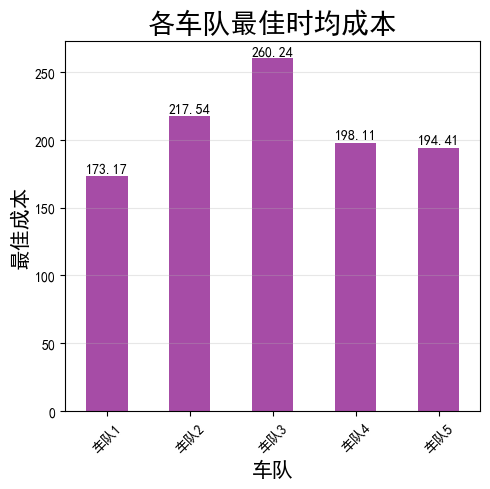

In [91]:
# 4. 将各车队的最佳时均成本绘制为柱状图，以比较不同车队之间的成本表现
plt.figure(figsize=(5,5))

df2['最佳成本'].plot(kind='bar',color='purple',alpha=0.7)
plt.title('各车队最佳时均成本',fontsize=20)
plt.grid(axis='y',alpha=0.3)
plt.xlabel('车队',fontsize=15)
plt.ylabel('最佳成本',fontsize=15)
plt.xticks(rotation=45)
for x,y in enumerate(df2['最佳成本']):
    plt.text(x,y+1,str(y),ha='center',va='bottom',fontsize=10)
plt.tight_layout()
plt.show()